In [1]:
%pylab inline
import torch
from sklearn import datasets
from tqdm import tqdm_notebook as tqdm
import gpushift

Populating the interactive namespace from numpy and matplotlib


In [2]:
def scatter(tensor):
    plt.figure()
    plt.scatter(*tensor[0, :, :2].detach().cpu().numpy().T, 
                marker='.', alpha=0.2, s=1)

Input shape: torch.Size([1, 10000, 2])


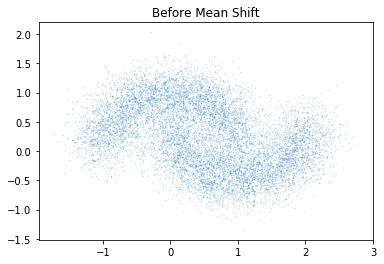

cuda:0


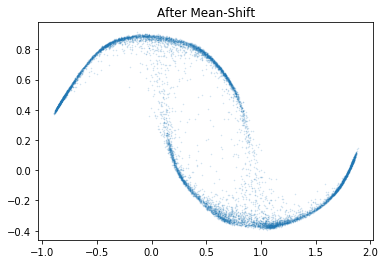

In [3]:
use_keops = True  # set to False if you want to see a memory overflow

N = 10000  # also try 100000

# make points
points = datasets.make_moons(n_samples=N, noise=.25)[0][None]  # B N E
points = torch.cuda.FloatTensor(points).contiguous().requires_grad_()
print(f'Input shape: {points.shape}')

scatter(points)
plt.title('Before Mean Shift')
plt.show()

# note: run without %time first
mean_shift = gpushift.MeanShift(
    n_iter=10,  
    kernel=gpushift.MeanShiftStep.GAUSSIAN_KERNEL,
    bandwidth=0.2,
    blurring=False,
    use_keops=use_keops
)

with torch.no_grad():
    points = mean_shift(points)

scatter(points)
plt.title('After Mean-Shift');

10 iterations of mean shift of 100000 datapoints in 32-dimensional space

Compiling libKeOpstorch3d53498fa4 in /export/home/rremme/.cache/pykeops-1.2-cpython-36//build-libKeOpstorch3d53498fa4:
       formula: Sum_Reduction((Step((Minus(Sum(Square((Var(0,32,0) - Var(1,32,1))))) + Var(2,1,2))) * Var(1,32,1)),0)
       aliases: Var(0,32,0); Var(1,32,1); Var(2,1,2); 
       dtype  : float32
... Done.
Compiling libKeOpstorcha85d499d66 in /export/home/rremme/.cache/pykeops-1.2-cpython-36//build-libKeOpstorcha85d499d66:
       formula: Sum_Reduction(Step((Minus(Sum(Square((Var(0,32,0) - Var(1,32,1))))) + Var(2,1,2))),0)
       aliases: Var(0,32,0); Var(1,32,1); Var(2,1,2); 
       dtype  : float32
... Done.
CPU times: user 5.81 s, sys: 1.95 s, total: 7.76 s
Wall time: 1min 24s



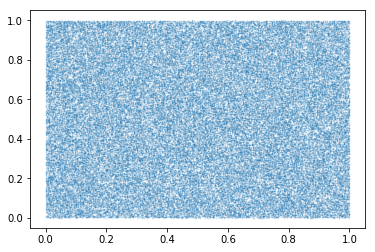

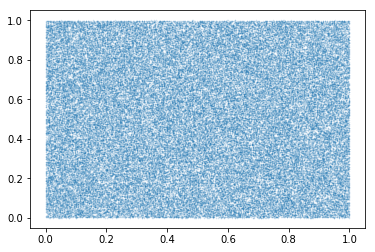

In [9]:
points = torch.rand((1, 100000, 32)).cuda().requires_grad_()

mean_shift = gpushift.MeanShift(
    n_iter=10,  
    kernel=gpushift.MeanShiftStep.FLAT_KERNEL,
    bandwidth=1,
    blurring=False,
    use_keops=use_keops
)
scatter(points)
%time points = mean_shift(points)
scatter(points)
print()